Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [27]:
#Euler Problem 3
#The prime factors of 13195 are 5, 7, 13 and 29. What is the largest prime factor of the number 600851475143?
def largest_prime_factor(n):
    factor = 2
    while factor * factor <= n:
        if n % factor == 0:
            n //= factor
        else:
            factor += 1
    return n

number = 600851475143
print(largest_prime_factor(number))

6857


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [36]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


Test Data
Mean Absolute Error:  0.5340867694760636
Root Mean Squared Error:  0.7260657030468503
R2 Score:  0.5957134681536271

Training Data
Mean Absolute Error:  0.5304337848242937
Root Mean Squared Error:  0.7236078920558632
R2 Score:  0.6087720178673138



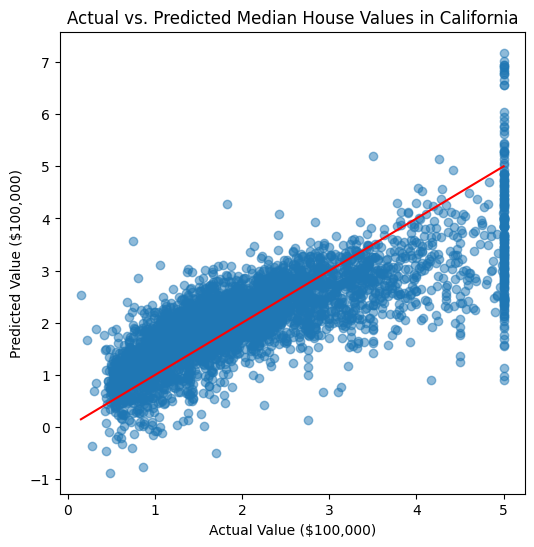

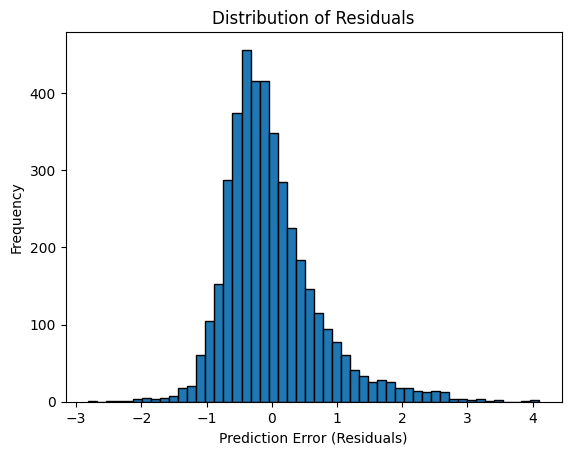

            Coefficients
MedInc          0.436693
HouseAge        0.009436
AveRooms       -0.107322
AveBedrms       0.645066
Population     -0.000004
AveOccup       -0.003787
Latitude       -0.421314
Longitude      -0.434514

Decision Tree Regressor
Test Data
Mean Absolute Error:  0.4673383478682171
Root Mean Squared Error:  0.7303044410401428
R2:  0.5909792772310118

Training Data
Mean Absolute Error:  4.200989255001198e-17
Root Mean Squared Error:  3.0561436068685523e-16
R2:  1.0


In [41]:
# Regression Model
reg = LinearRegression().fit(X,y)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

#Basic Analysis
#Test Data
print("Test Data")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_test_pred))
print("Root Mean Squared Error: ", root_mean_squared_error(y_test, y_test_pred))
print("R2 Score: ", r2_score(y_test, y_test_pred))
print("")

#Training Data
print("Training Data")
print("Mean Absolute Error: ", mean_absolute_error(y_train, y_train_pred))
print("Root Mean Squared Error: ", root_mean_squared_error(y_train, y_train_pred))
print("R2 Score: ", r2_score(y_train, y_train_pred))
print("")

#Visulization and Analysis

#Scatterplot - Edit
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="-")
plt.xlabel("Actual Value ($100,000)")
plt.ylabel("Predicted Value ($100,000)")
plt.title("Actual vs. Predicted Median House Values in California")
plt.show()

#Histogram of Model Error

#Residuals
residuals = y_test - y_test_pred

#Histogram Plot
plt.hist(residuals, bins = 50, edgecolor="black")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

#Predictor Variable Importance
regression_coefficents = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficients'])
print(regression_coefficents)
print("")

#Other Regression Method - Descion Tree Regressor
print("Decision Tree Regressor")
Decision_Tree_Reg = DecisionTreeRegressor()
Decision_Tree_Reg.fit(X_train, y_train)
y_train_pred_tree = Decision_Tree_Reg.predict(X_train)
y_test_pred_tree = Decision_Tree_Reg.predict(X_test)

#Test Data
print("Test Data")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_test_pred_tree))
print("Root Mean Squared Error: ", root_mean_squared_error(y_test, y_test_pred_tree))
print("R2: ", r2_score(y_test, y_test_pred_tree))
print("")

#Training Data
print("Training Data")
print("Mean Absolute Error: ", mean_absolute_error(y_train, y_train_pred_tree))
print("Root Mean Squared Error: ", root_mean_squared_error(y_train, y_train_pred_tree))
print("R2: ", r2_score(y_train, y_train_pred_tree))



# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

In [32]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


Training Accuracy:  0.989010989010989
Test Accuracy:  0.9824561403508771
ROC Accuracy:  0.9963624338624338
Average Precision:  0.9978366207829656


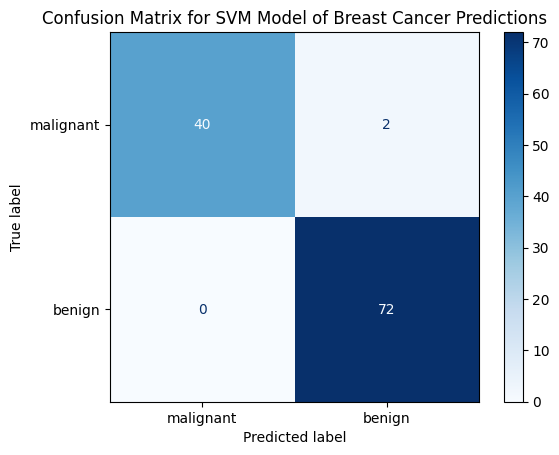

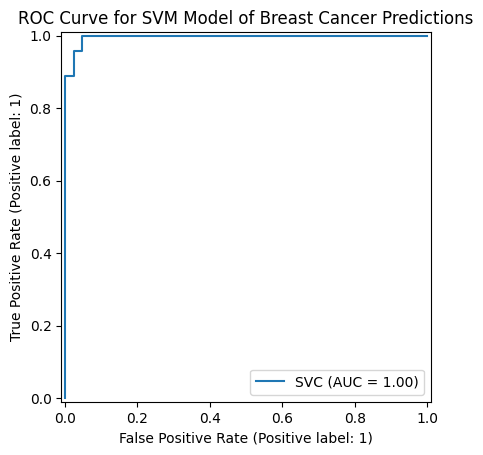

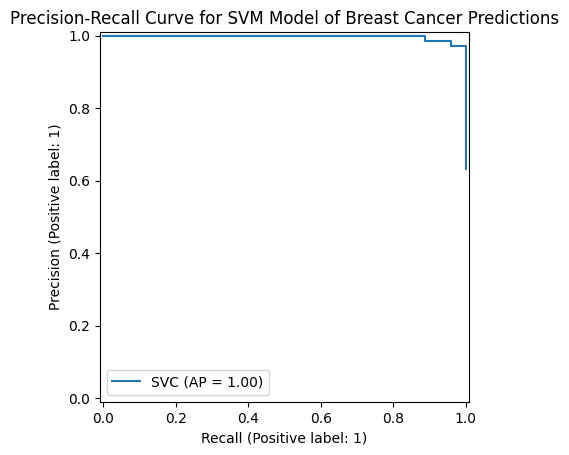

                         Coefficients
mean radius                 -0.404961
mean texture                -0.192708
mean perimeter              -0.328945
mean area                   -0.487837
mean smoothness              0.164633
mean compactness             0.412006
mean concavity              -0.650475
mean concave points         -0.967260
mean symmetry               -0.107180
mean fractal dimension       0.325190
radius error                -0.944002
texture error                0.225922
perimeter error             -0.312524
area error                  -0.611921
smoothness error            -0.255790
compactness error            0.452485
concavity error              0.190326
concave points error        -0.634202
symmetry error               0.245869
fractal dimension error      0.785565
worst radius                -0.628881
worst texture               -0.908194
worst perimeter             -0.432630
worst area                  -0.610313
worst smoothness            -0.524760
worst compac

In [33]:
#SVM Model
model = SVC(kernel = 'linear', probability = True)
model.fit(X_train_std, y_train)

#Predictions
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
y_test_proba = model.predict_proba(X_test_std)[:, 1]

#Analysis
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("ROC Accuracy: ", roc_auc_score(y_test, y_test_proba))
print("Average Precision: ", average_precision_score(y_test, y_test_proba))

#Plotting
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for SVM Model of Breast Cancer Predictions")
plt.show()

RocCurveDisplay.from_estimator(model, X_test_std, y_test)
plt.title("ROC Curve for SVM Model of Breast Cancer Predictions")
plt.show()

PrecisionRecallDisplay.from_estimator(model, X_test_std, y_test)
plt.title("Precision-Recall Curve for SVM Model of Breast Cancer Predictions")
plt.show()

svm_coefficents = pd.DataFrame(model.coef_.ravel(), X.columns, columns=['Coefficients'])
print(svm_coefficents)